[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/yingwang-git/R_StatisticAnalysis/HEAD?filepath=1_LinearRegression.ipynb)

**Click above button to run code online. It may take a long time to load.**

# Linear Regression
(Below Links are Unavailable in GitHub)

1. [Introduction](#introduction-to-linear-regression)
2. [Simple Linear Regression](#simple-linear-regression)
3. [Multiple Linear Regression](#multiple-linear-regression)


# Introduction to Linear Regression

# Simple Linear Regression

The simple linear regression involves only one independent variable (X) and one dependent variable (Y).

## import packages

In [1]:
if (!require("pacman")) install.packages("pacman")
pacman::p_load(
  ggplot2  # for data visualization
  )

Loading required package: pacman



## data preparation

1. We used a built-in dataset "cars" in R as the sample data.
2. The data give the speed of cars and the distances taken to stop. The variables and definition are listed below.

In [31]:
# load the dataset
data("cars")

## data description

In [32]:
# see all variables and types
str(cars)

'data.frame':	50 obs. of  2 variables:
 $ speed: num  4 4 7 7 8 9 10 10 10 11 ...
 $ dist : num  2 10 4 22 16 10 18 26 34 17 ...


The "cars" dataset is a dataset with 50 observations on 2 variables ("speed" and "dist").

## data visualization

### dependent variable

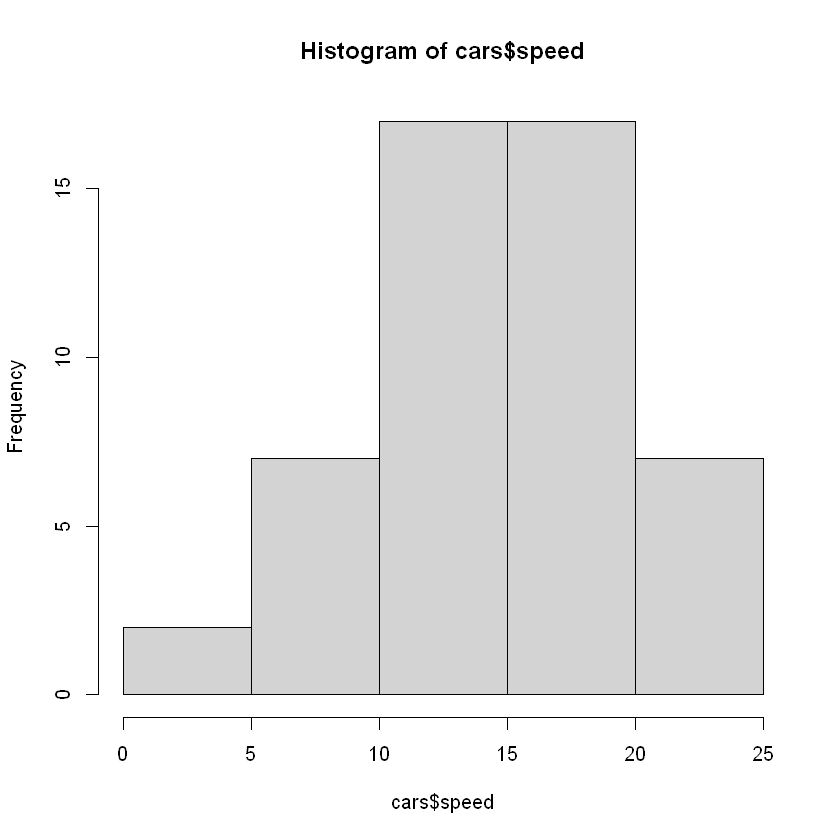

In [27]:
hist(cars$speed)

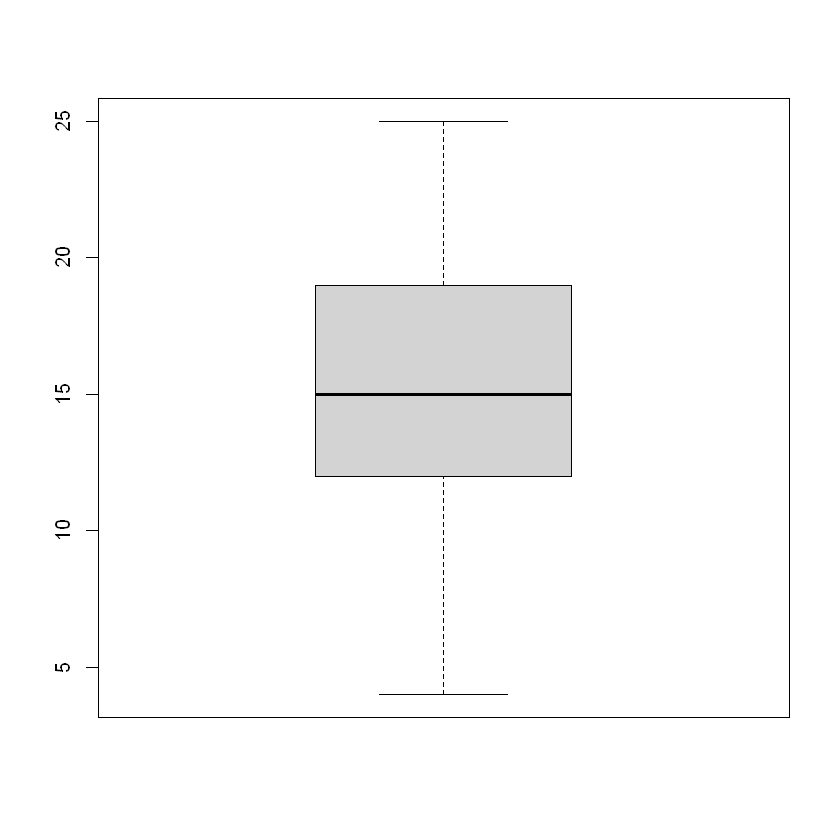

In [28]:
boxplot(cars$speed)

The histogram show that our dependent variable ("speed") is nearly normal distributed.  
The box plot show that our dependent variable ("speed") has no outliers.  
If the distribution is skewed or the dependent vairable has some outliers, we need do further preprocessing.

### correlations

`geom_smooth()` using formula 'y ~ x'



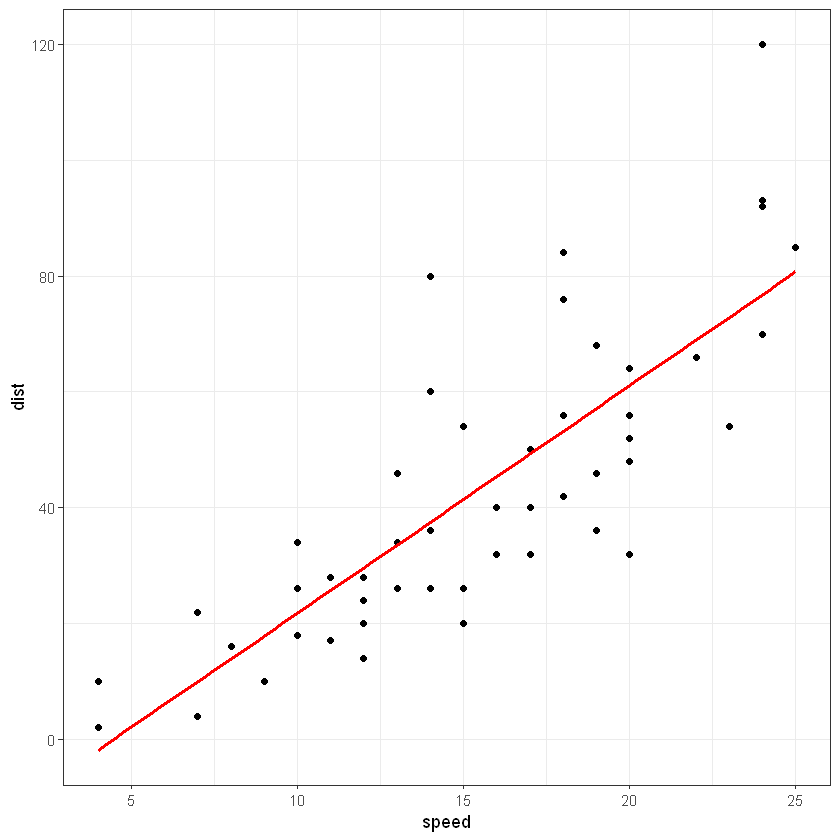

In [39]:
ggplot(cars, aes(x=speed, y=dist)) +
    geom_point() + 
    geom_smooth(method="lm", color="red", se=F) + 
    theme_bw()

# Multiple Linear Regression

## data introduction

1. We used a built-in dataset "Boston" in MASS package as the sample data.
2. All variables and definition are listed below.
3. We aim to model the relationship between Boston housing price and other factors. The dependent variable is the housing price "medv".

| **variable** | **description**                                                        |
|--------------|------------------------------------------------------------------------|
| crim         | per capita crime rate by town.                                         |
| zn           | proportion of residential land zoned for lots over 25,000 sq.ft.       |
| indus        | proportion of non-retail business acres per town.                      |
| chas         | Charles River dummy variable (= 1 if tract bounds river; 0 otherwise). |
| nox          | nitrogen oxides concentration (parts per 10 million).                  |
| rm           | average number of rooms per dwelling.                                  |
| age          | proportion of owner-occupied units built prior to 1940.                |
| dis          | weighted mean of distances to five Boston employment centres.          |
| rad          | index of accessibility to radial highways.                             |
| tax          | full-value property-tax rate per \$10,000.                             |
| ptratio      | pupil-teacher ratio by town.                                           |
| black        | 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.        |
| lstat        | lower status of the population (percent).                              |
| medv         | median value of owner-occupied homes in \$1000s.                       |

## data preparation

In [25]:
# import packages
# ingore the warning
if (!require("pacman")) install.packages("pacman")
pacman::p_load(
  MASS  # for load the dataset
  )

In [29]:
data("Boston")  # load the "Boston" dataset and rename into "data"

## data description

In [30]:
str(Boston)  # show basic info and type of variables

'data.frame':	506 obs. of  14 variables:
 $ crim   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ zn     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ indus  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ chas   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ nox    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rm     : num  6.58 6.42 7.18 7 7.15 ...
 $ age    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ rad    : int  1 2 2 3 3 3 5 5 5 5 ...
 $ tax    : num  296 242 242 222 222 222 311 311 311 311 ...
 $ ptratio: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ black  : num  397 397 393 395 397 ...
 $ lstat  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ medv   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


In [4]:
head(data)  # show first 6 rows of the dataset

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [20]:
summary(data)  # summary statistics of all variables

      crim                zn             indus            chas        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.: 0.08205   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median : 0.25651   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14   Mean   :0.06917  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
      nox               rm             age              dis        
 Min.   :0.3850   Min.   :3.561   Min.   :  2.90   Min.   : 1.130  
 1st Qu.:0.4490   1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100  
 Median :0.5380   Median :6.208   Median : 77.50   Median : 3.207  
 Mean   :0.5547   Mean   :6.285   Mean   : 68.57   Mean   : 3.795  
 3rd Qu.:0.6240   3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188  
 Max.   :0.8710   Max.   :8.780   Max.   :100.00   Max.   :12.127  
      rad              tax 

## data visualization

### dependent variable

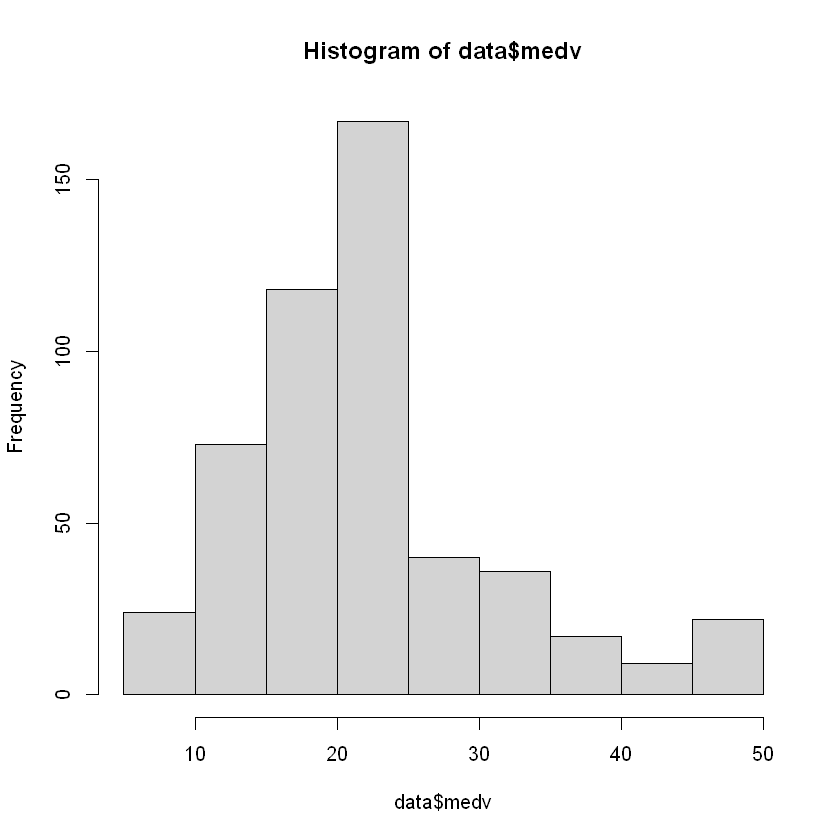

In [4]:
hist(data$medv)  # histogram of "medv" to see the distritbuion

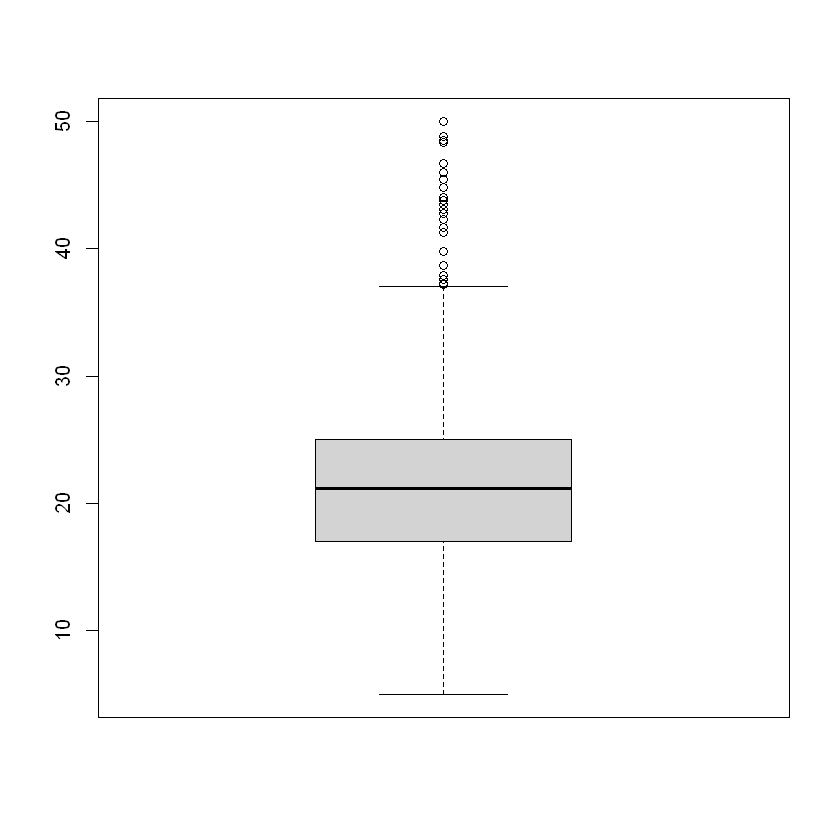

In [5]:
boxplot(data$medv)

The histogram show the "medv" is skewed.   
The boxplot shows there are some outliers.  
Thus, we consider to do further processing.

### correlations

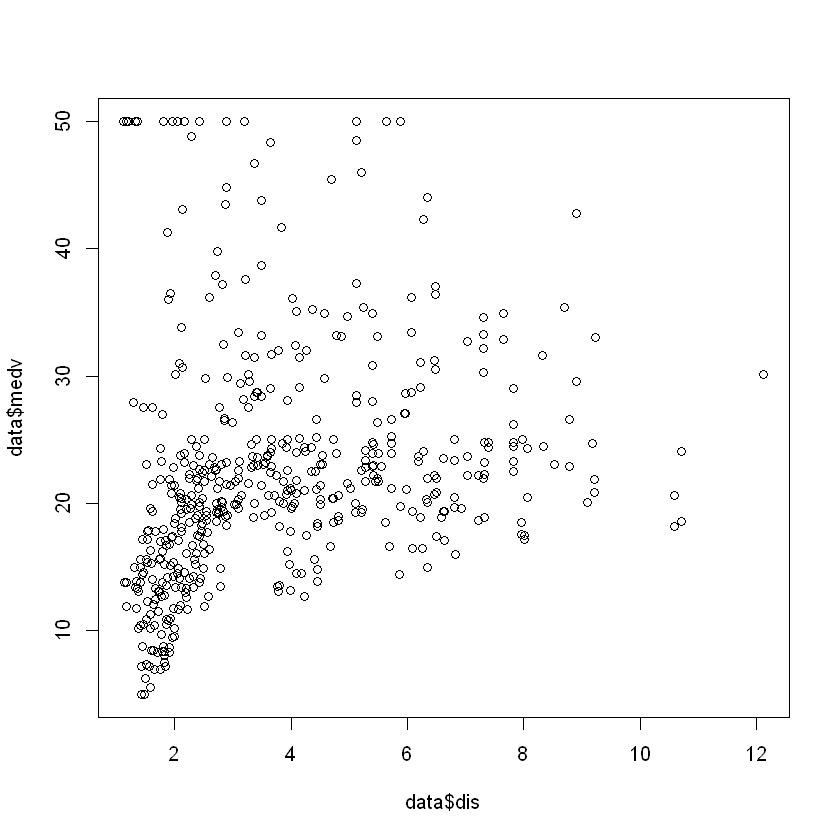

In [10]:
plot(data$dis, data$medv)